In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# load clean data
df = pd.read_csv('../data/cleaned_heart_disease.csv')
x = df.drop('num', axis=1)
y = df['num']

#apply PCA
pca = PCA()
x_pca = pca.fit_transform(x)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

Text(0, 0.5, 'expalined variance Ratio')

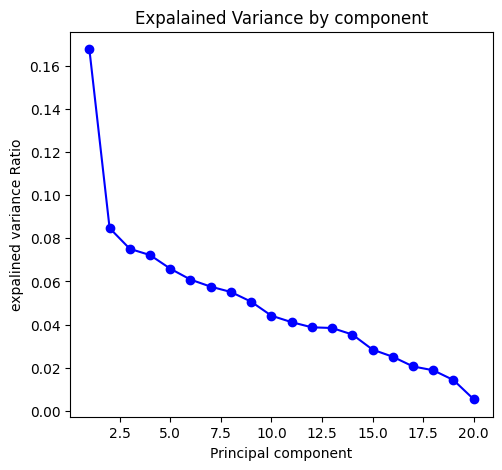

In [3]:
#plot variance explained
plt.figure(figsize=(12 ,5))
plt.subplot(1,2,1)
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-')
plt.title('Expalained Variance by component')
plt.xlabel('Principal component')
plt.ylabel('expalined variance Ratio')


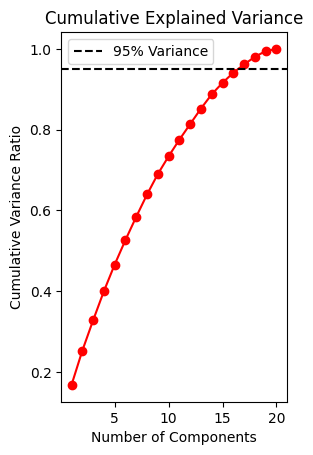

In [4]:
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Ratio')
plt.legend()
plt.savefig('../results/pca_analysis.png')


In [5]:
n_components = np.argmax(cumulative_variance >= 0.95) + 1
pca_optimal = PCA(n_components=n_components)
X_pca_reduced = pca_optimal.fit_transform(x)


In [6]:
pca_df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['target'] =y
pca_df.to_csv('../data/pca_transformed.csv',index=False)
